<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement : To seggregate the data into clusters in order to check what is the spending score based on the income of customers.
Basically we would be able to check or predict which type of audience shall we target for maximum sales of the mall

#Importing DataSet and Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataSet = pd.read_csv("Mall_Customers.csv")

In [6]:
dataSet

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Text(0.5, 1.0, 'Spending Score vs Annual Income')

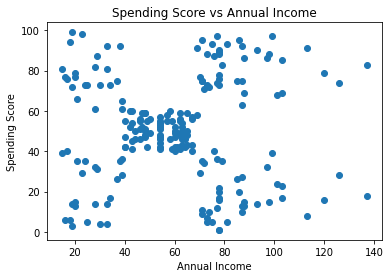

In [16]:
# now to visualize it properly we can plot the data in scattered manner so as to see if there are any patterns which can 
# as of now let us consider that we are are checking the spending score based on annual income of the customers
plt.scatter(dataSet.iloc[:,3].values, dataSet.iloc[:,4].values,)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Spending Score vs Annual Income")

In [ ]:
# from the above plot we are ablre to visualize that there will be approximately 5 clusters present in our dataset
# so now let us run our algorithm and see whether our assumption is proper or not :D

# Splitting our dataSet


In [35]:
x = dataSet.iloc[:,[3,4]].values

In [36]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#Using elbow method to determine the perfect number of clusters

In [37]:
# the concept of within cluster sum of squares is gonna be used here as far as the algorithm is concerned
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  # here we are creating model of Kmeans clustering at that instant with number of clusters being "i"
  kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
  # We are going to fit this model along with the the dataset we have prepared
  kmeans.fit(x)
  # now we will be appending the within cluster sum of squares of each model 
  wcss.append(kmeans.inertia_)


In [38]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21850.165282585636,
 19672.072849014323]

In [19]:
# in the above loop we can see what are the clusters having wcss 
# now just an overview of elbow point :  we are supposed to find a point after which the wcss decreases gradually


Text(0.5, 1.0, 'WCSS vs Number of clusters')

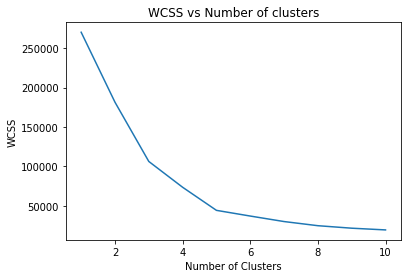

In [39]:
plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("WCSS vs Number of clusters")

In [40]:
# so here as the name elbow point signifies we can see when we will be having 5 clusters then the drop of wcss is gradual or continuous
# we can conclude that we can have 5 clusters as the appropriate number of clusters

# Training the model on dataSet

In [41]:
kmeans  = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans
# fit_predict(x) will be returning the predicted cluster for given value as per our dataSet is concerned

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

# Visualising the Clusters

Text(0.5, 1.0, 'Clusters of Customers')

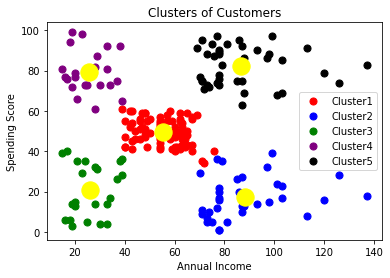

In [63]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = "red", s =50, label = "Cluster1")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = "blue", s =50, label = "Cluster2")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = "green", s =50, label = "Cluster3")
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], c = "purple", s =50, label = "Cluster4")
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], c = "black", s =50, label = "Cluster5")

# below are the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c = "yellow")
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clusters of Customers")